## Lab | Cleaning numerical data ##

**Context**

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.
Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting

**Instructions**
1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Formatting the columns as instructed 
data.rename(columns=str.lower, inplace=True)
data.columns = data.columns.str.replace(' ', '_')
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data

/var/folders/55/2k8v69bx3rb3kj6zvhtb3bcc0000gn/T/ipykernel_41887/3144467407.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
numerical_df = data.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [5]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [6]:
def separate(df):
    continuous_vars = pd.DataFrame()
    discrete_vars = pd.DataFrame()

    for column in df.columns:
        if len(df[column].unique()) > 10:
            continuous_vars[column] = df[column]
        else:
            discrete_vars[column] = df[column]

    return continuous_vars, discrete_vars

continuous_vars, discrete_vars = separate(numerical_df)

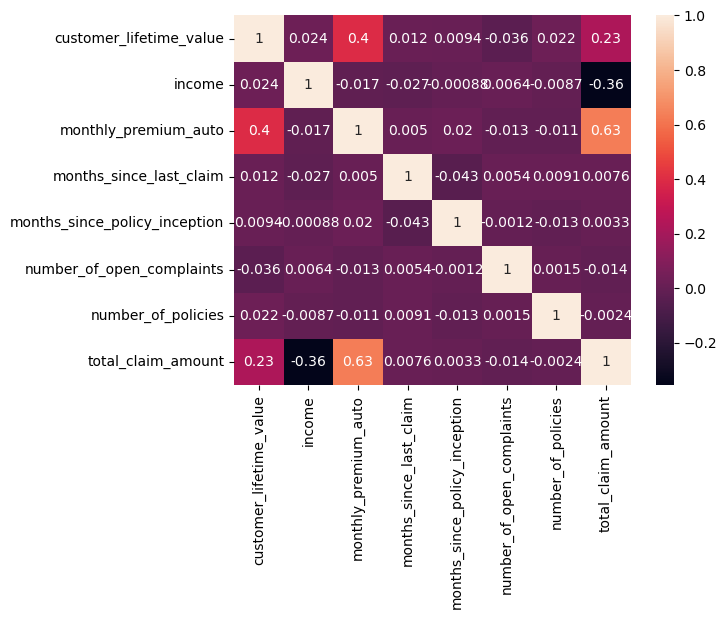

In [7]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# It looks like some of the categories are quite correlated to the target. Monthly_premium_auto and total_claim_amount and to a lesser extent CLV

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

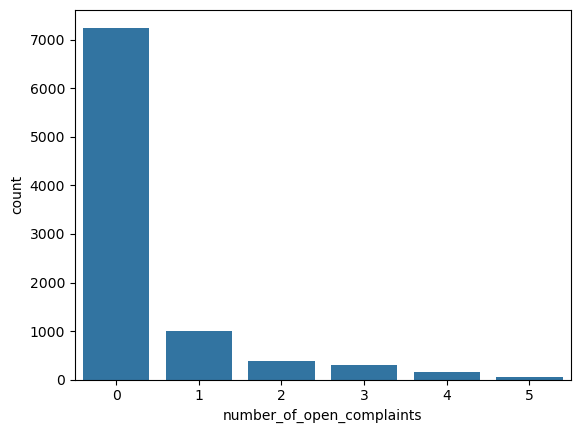

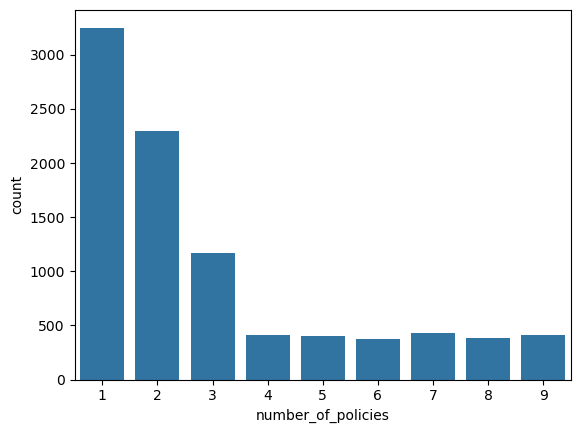

In [9]:
# Here's my function to plot every discrete variable 
def discrete_plot(df):
    for column in df.columns:
        sns.countplot(x=column, data=df)
        plt.show()

test = discrete_plot(discrete_vars)

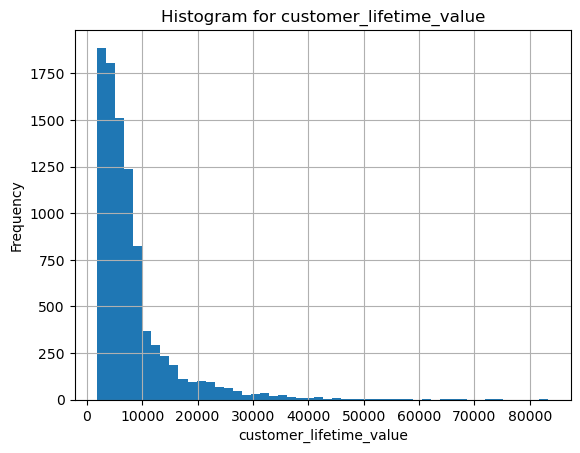

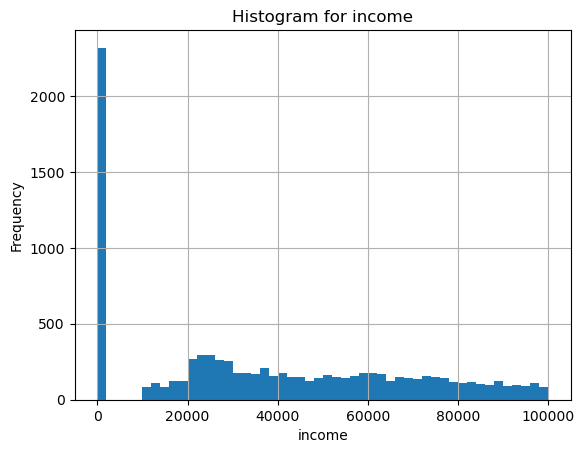

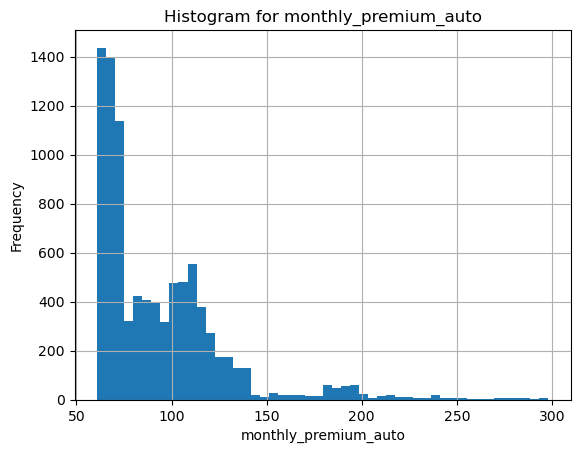

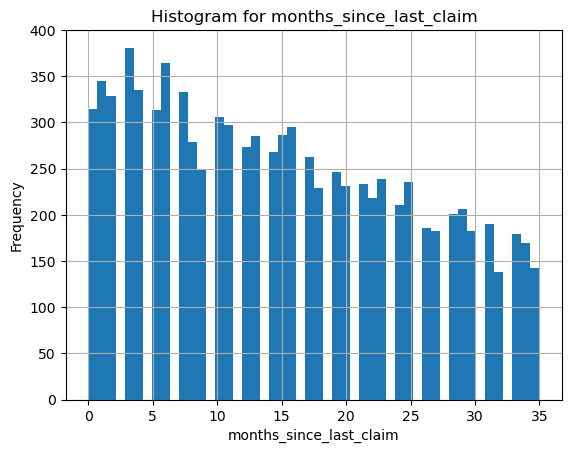

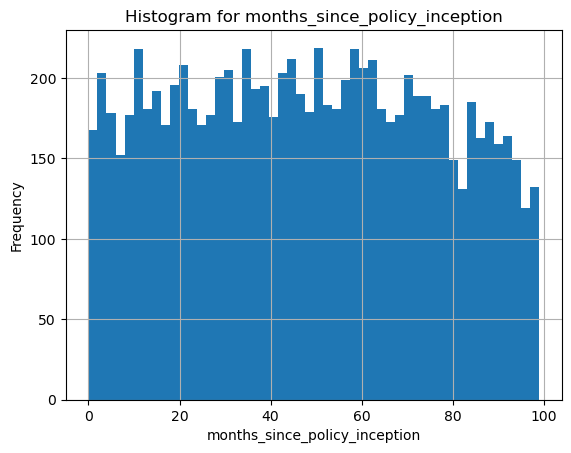

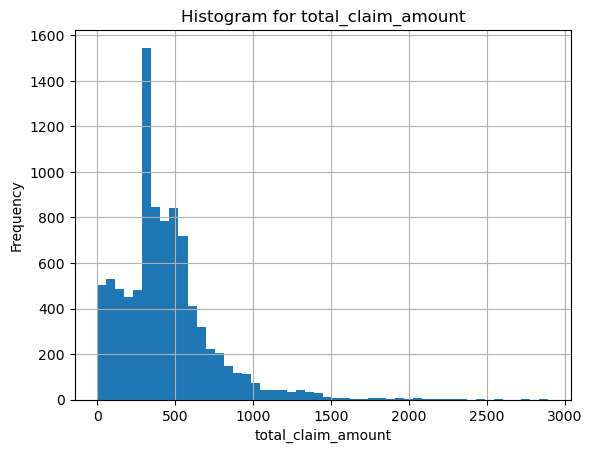

In [24]:
# Here's my function to plot every continuous variable 
# def continuous_plot(df):
#     for column in df.columns:
#         df.hist(bins=50)
#         plt.show()

# test2 = continuous_plot(continuous_vars)

def continuous_plot(df):
    for column in df.columns:
        df[column].hist(bins=50)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

test2 = continuous_plot(continuous_vars)

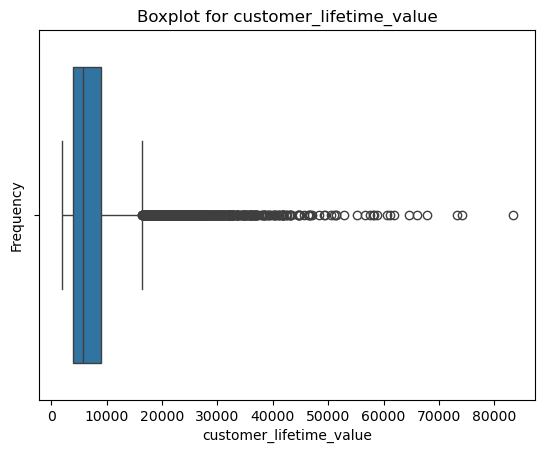

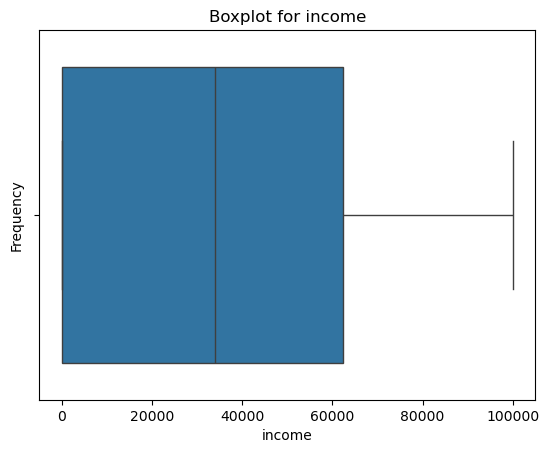

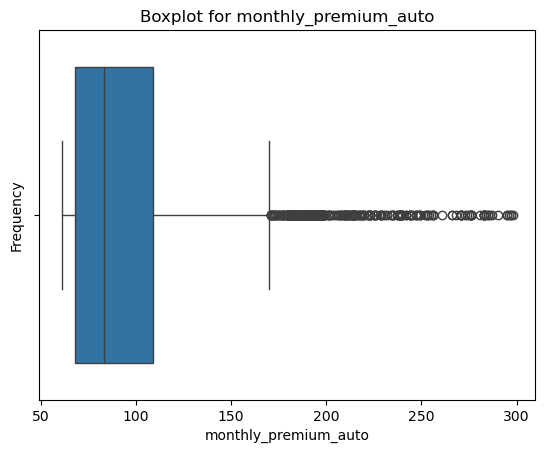

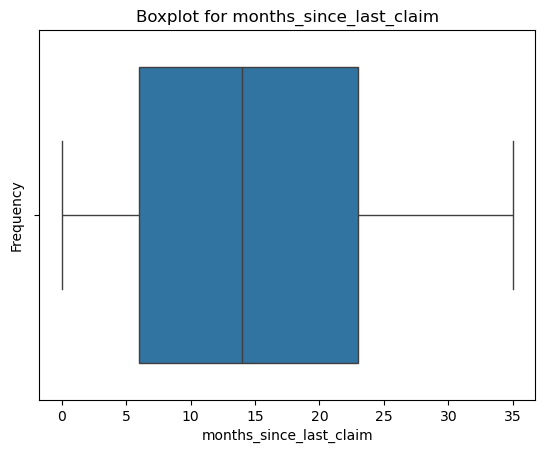

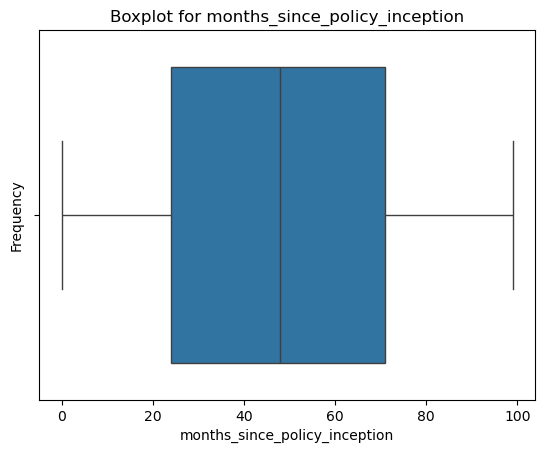

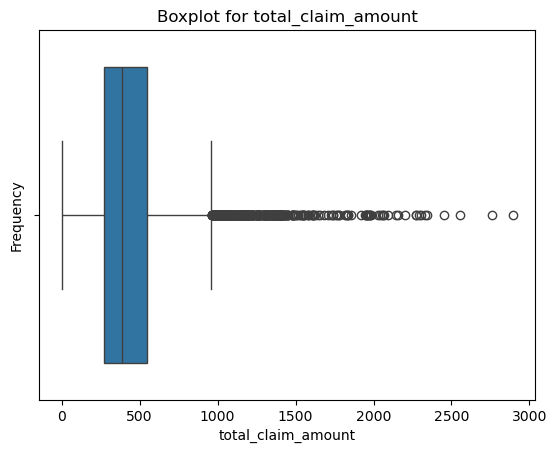

In [30]:
# def outlier(df):
#     for column in Dataframe.columns:
#         sns.boxplot(x=Dataframe[column])
#         plt.show()
#     return None 

# outlier(continuous_vars)

def outliers_plot(df):
    for column in df.columns:
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

test3 = outliers_plot(continuous_vars)

In [ ]:
# For the continuous data, the data is fairly well split with a slight left skew.
# There don't appear to be massive outliers because even the top categories have multiple entries. Not much if any cleaning required 
# For the discrete ones, there are lots of outliers in many of the tables: 
# CLV, claim amount, monthly_premium_auto, total_claim_amount 
# I'm going to remove the outliers for these categories mentioned above except total_claim_amount because that's the target

In [11]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(data['customer_lifetime_value'],75) - np.nanpercentile(data['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(data['customer_lifetime_value'],75) + 1.5*iqr
print(iqr)
print(upper_limit)
extraordinary_points = data[data['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed
data = data[data['customer_lifetime_value'] <= upper_limit].copy()

4967.915247000001
16414.039911750002


In [14]:
data['customer_lifetime_value'].count()

8317

In [15]:
# No null values but plenty of 0s. Not sure what to do with them! 
empty = data.isnull().sum()
print(empty)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [18]:
data['income'].isnull().sum()
(data['income'] == 0).sum()

2116

In [16]:
# Running this again so that it takes the clean version rather than the old version 
numerical_df = data.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [32]:
# Saving as a pdf
numerical_df.to_csv('numerical_df.csv', index=False)

## Lab | Cleaning categorical data ## 

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [47]:
cats = data.select_dtypes(include = object)
cats

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [36]:
empty = cats.isnull().sum()
print(empty)
# There are no null values in any categorical column - woo

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64


In [42]:
unique = cats.apply(pd.Series.unique)
unique

customer            [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state               [Washington, Arizona, Nevada, California, Oregon]
response                                                    [No, Yes]
coverage                                   [Basic, Extended, Premium]
education           [Bachelor, College, Master, High School or Bel...
employmentstatus    [Employed, Unemployed, Medical Leave, Disabled...
gender                                                         [F, M]
location_code                                [Suburban, Rural, Urban]
marital_status                            [Married, Single, Divorced]
policy_type             [Corporate Auto, Personal Auto, Special Auto]
policy              [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                     [Offer1, Offer3, Offer2, Offer4]
sales_channel                       [Agent, Call Center, Web, Branch]
vehicle_class       [Two-Door Car, Four-Door Car, SUV, Sports Car,...
vehicle_size        

In [44]:
cats.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [54]:
# Going to clean Renew offer type because the word offer is redundant 
# Going to clean policy_type because the word Auto is redundant (it's in every row) 
# Also going to clean policy to remove the word before the space, since it's redundant - already in another column
# Not going to clean the customer ID because the letters could be significant
cats['renew_offer_type'] = cats['renew_offer_type'].str.replace('Offer', '')
cats['policy_type'] = cats['policy_type'].str.replace('Auto', '')
cats['policy'] = cats['policy'].str.split(n=1).str[1]
cats 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,L3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,L3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,L3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,L2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,L1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal,L2,1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,L3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,L2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal,L2,3,Branch,Four-Door Car,Large


In [56]:
# Checking the nuber in each column 
cats.nunique()

customer            8317
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 3
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [ ]:
# It's tempting to just turn the response column into a 0 and 1 as the only two options (likely the result of encoding anyway) and then save on a column 
# The same could be said for Gender (so long as you remember which is which) 
# Potentially the same for those with 3 categories 

In [ ]:
# Can drop the "personal" part of the policy becuase it's already in policy_type
# This can save us from encoding 10 columns 